In [2]:
from Higgs.tools.ImplementationUtils import readHEPDataCsv, implementMeasurement
from Higgs.tools.MeasurementValidation import *
import Higgs.signals as HS
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from itertools import product

## CMS `ttH/tH > leptons & taus` 137fb-1 [2011.03652](http://arxiv.org/abs/2011.03652)

This analysis is missing acceptance information for the three final states in all of the ttH categories. We tried generalizing the previous results but that yielded results that were suspiciously more precise than the fits shown in the paper and additionally significantly disfavored the SM. We asked CMS about this, until this is clarified, we instead re-implement the 36fb-1 analysis that was implemented in HS-2 (see below).

In [6]:
# dfttH = (
#     readHEPDataCsv(
#         "https://www.hepdata.net/download/table/ins1828962/Figure%2014%20(ttH)/1/csv"
#     )[0]
#     .set_index("Region")
#     .drop(index=["Combined"])
# )

# binsHtt = {
#     k: {
#         "obs": [
#             r["Region.1"] + r["Total -"],
#             r["Region.1"],
#             r["Region.1"] + r["Total +"],
#         ],
#         "ref": [1, 1, 1],
#         "process": {"channels": [["Htt", d] for d in ["WW", "ZZ", "tautau"]]},
#     }
#     for k, r in dfttH.iterrows()
# }

# # these are from HS-2, extracted from Aux. Fig. 1 of 1803.05485 as ratios
# # between the plotted and the inclusive signal composition by Tim
# binsHtt["1l2tau"]["channelWeights"] = [1.0, 1.63, 64.57]
# binsHtt["2lss0tau"]["channelWeights"] = [1.0, 0.31, 0.78]
# binsHtt["2lss1tau"]["channelWeights"] = [1.0, 0.19, 4.47]
# binsHtt["3l0tau"]["channelWeights"] = [1.0, 0.52, 0.75]
# binsHtt["3l1tau"]["channelWeights"] = [1.0, 0.86, 5.24]
# binsHtt["4l"]["channelWeights"] = [1.0, 1.23, 0.75]

# # these are guesses based on the above
# binsHtt["2los1tau"]["channelWeights"] = binsHtt["2lss1tau"]["channelWeights"]
# binsHtt["2l2tau"]["channelWeights"] = binsHtt["1l2tau"]["channelWeights"]
# # these are the categories with two hadronic tops, use the efficiencies from the
# # +1l channel above
# binsHtt["0l2tau"]["channelWeights"] = binsHtt["1l2tau"]["channelWeights"]
# binsHtt["1l1tau"]["channelWeights"] = binsHtt["2lss1tau"]["channelWeights"]

# dftH = (
#     readHEPDataCsv(
#         "https://www.hepdata.net/download/table/ins1828962/Figure%2014%20(tH)/1/csv"
#     )[0]
#     .set_index("Region")
#     .drop(index=["Combined"])
# )

# channels = [[p, d] for p, d in itertools.product(["Ht", "HtW"], ["WW", "ZZ", "tautau"])]

# binsHt = {
#     k: {
#         "obs": [
#             r["Region.1"] + r["Total -"],
#             r["Region.1"],
#             r["Region.1"] + r["Total +"],
#         ],
#         "ref": [1, 1, 1],
#         "process": {"channels": channels},
#     }
#     for k, r in dftH.iterrows()
# }
# # first three channel entries are `Ht`, second three are `HtW`
# binsHt["2lss0tau"]["channelWeights"] = [5.3, 1.08, 3.2] + [12.3, 0.4, 7]  # * 1e-3
# binsHt["3l0tau"]["channelWeights"] = [6.5, 4.5, 3.15] + [31, 6.5, 17]  # * 1e-4
# binsHt["2lss1tau"]["channelWeights"] = [2, 0.6, 14.7] + [10, 2, 41]  # * 1e-4

# bins = {"Htt_" + k: v for k, v in binsHtt.items()} | {
#     "Ht_" + k: v for k, v in binsHt.items()
# }
# measFile = implementMeasurement(
#     "2011.03652",
#     "Fig. 14, http://cms-results.web.cern.ch/cms-results/public-results/publications/HIG-17-018/CMS-HIG-17-018_Figure-aux_001.png",
#     bins,
#     prefix="ttH_lep",
#     referenceMass=125,
#     massResolution=20,
# )


## CMS `ttH/tH > leptons & taus` 36fb-1 [1803.05485](http://arxiv.org/abs/1803.05485)
Implementation taken over from the HS-2 implementation. The channelweights are taken from [Aux Fig 1](http://cms-results.web.cern.ch/cms-results/public-results/publications/HIG-17-018/index.html#Figure-aux_001).

In [4]:
subChannels = {
    "1l2tauh": {"obs": [-3.24, -1.52, 0.24], "channelWeights": 3 * [1.0, 1.63, 64.57]},
    "2lss": {"obs": [1.1, 1.61, 2.19], "channelWeights": 3 * [1.0, 0.31, 0.78]},
    "2lss1tauh": {"obs": [0.27, 0.94, 1.74], "channelWeights": 3 * [1.0, 0.19, 4.47]},
    "3l": {"obs": [0.11, 0.82, 1.59], "channelWeights": 3 * [1.0, 0.52, 0.75]},
    "3l1tauh": {"obs": [0.27, 1.34, 2.76], "channelWeights": 3 * [1.0, 0.86, 5.24]},
    "4l": {"obs": [-1.0, 0.57, 2.86], "channelWeights": 3 * [1.0, 1.23, 0.75]},
}

channels = [
    [p, d] for p, d in itertools.product(("Htt", "Ht", "HtW"), ("WW", "ZZ", "tautau"))
]

for chan in subChannels.values():
    chan["process"] = {"channels": channels}
    chan["ref"] = [1, 1, 1]

measFile = implementMeasurement(
    "1803.05485",
    "Fig. 6, Aux. Fig. 1",
    subChannels,
    prefix="ttH_lep",
    referenceMass=125,
    massResolution=20,
)


Looks good. Saving this to ttH_lep_LHC13_CMS_36.json


Nothing to really compare to, but this matches expectations (very little kappa_v sensititvity) and the ATLAS measurement below.

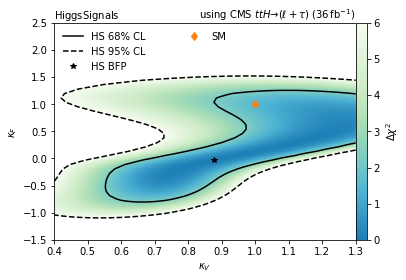

In [5]:
kappaF = np.linspace(-1.5, 2.5)
kappaV = np.linspace(0.4, 1.3)
fig, ax = validateMeasurementKappa(
    HS.Measurement(measFile),
    kappaF,
    kappaV,
    r"$ttH\to (\ell+\tau)$",
)

## ATLAS `ttH/tH > leptons & taus` 80fb-1 [ATLAS-CONF-2019-045](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/CONFNOTES/ATLAS-CONF-2019-045/)

Implementation taken over from the HS-2 implementation. The channelweights are taken from Fig. 4a of the corresponding 36fb-1 analysis [1712.08891](https://arxiv.org/abs/1712.08891).

In [4]:
subChannels = {
    "1l2tau": {
        "obs": [-0.60, 0.30, 1.41],
        "channelWeights": 3 * [1.00, 2.16516, 178.073, 0.0959487, 0.0959487],
    },
    "2lss": {
        "obs": [-0.16, 0.38, 0.95],
        "channelWeights": 3 * [1.0, 0.177857, 0.707155, 0.00501565, 0.00501565],
    },
    "2lss1tau": {
        "obs": [-0.42, 0.43, 1.53],
        "channelWeights": 3 * [1.00, 0.19765, 4.92022, 0.008759, 0.008759],
    },
    "3l": {
        "obs": [0.41, 0.93, 1.51],
        "channelWeights": 3 * [1.00, 0.591722, 0.562886, 0.009491, 0.009491],
    },
    "3l1tau": {
        "obs": [-0.42, 0.43, 1.53],
        "channelWeights": 3 * [1.00, 0.857246, 5.73612, 0.00991, 0.00991],
    },
    "4l": {
        "obs": [-0.20, 0.52, 1.45],
        "channelWeights": 3 * [1.00, 0.722545, 0.757837, 0.00925807, 0.00925807],
    },
}

channels = [
    [p, d]
    for p, d in itertools.product(
        ("Htt", "Ht", "HtW"), ("WW", "ZZ", "tautau", "bb", "mumu")
    )
]

for chan in subChannels.values():
    chan["process"] = {"channels": channels}
    chan["ref"] = [1, 1, 1]

measFile = implementMeasurement(
    1759582,
    "Fig. 8, https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/HIGG-2017-02/fig_04a.png",
    subChannels,
    prefix="ttH_lep",
    referenceMass=125,
    massResolution=20,
)


No arxiv eprint found.
Looks good. Saving this to ttH_lep_LHC13_ATLAS_80.json


Nothing to compare to, but this looks reasonable. As expected, there is decent sensitivity to `k_F` and essentially none to `k_V`, with a secondary region at negative `k_F`.

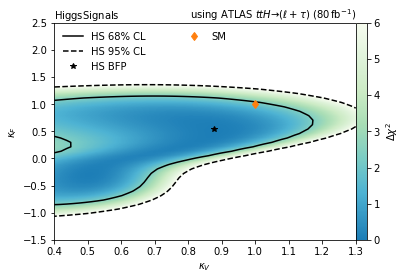

In [5]:
kappaF = np.linspace(-1.5, 2.5)
kappaV = np.linspace(0.4, 1.3)
fig, ax = validateMeasurementKappa(
    HS.Measurement(measFile),
    kappaF,
    kappaV,
    r"$ttH\to (\ell+\tau)$",
)
